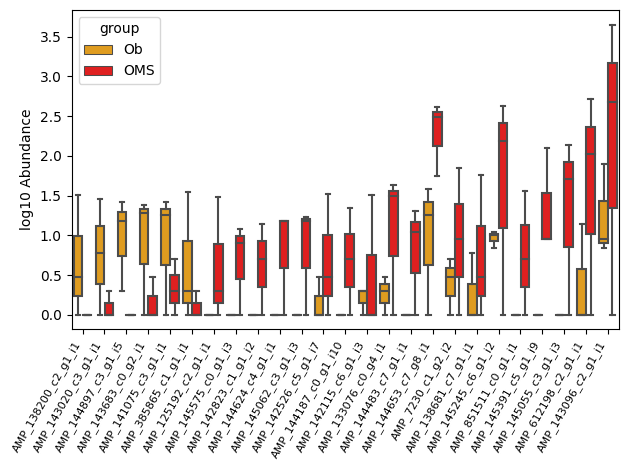

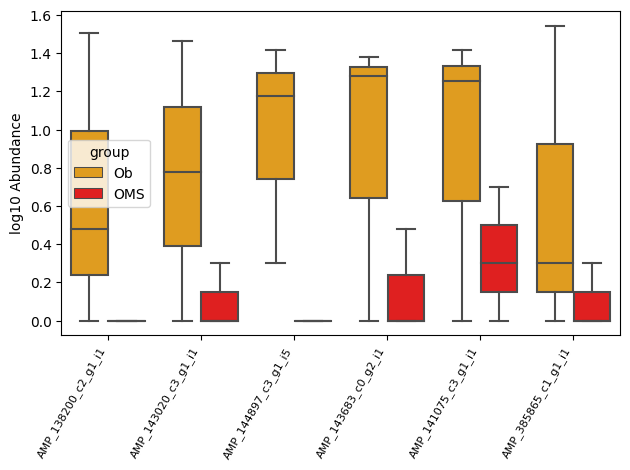

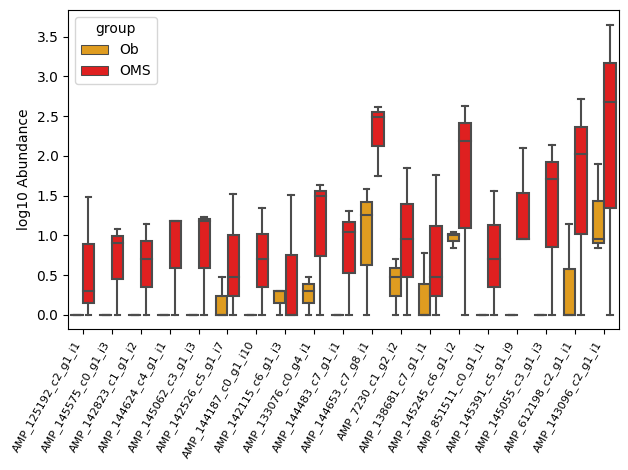

<Figure size 640x480 with 0 Axes>

In [41]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Data import
data = pd.read_csv("./amps_overexpressed_groups.tsv", delimiter="\t", index_col=0).T

data = pd.melt(data, id_vars=[("group")])

data["value"] = data["value"].astype("float")
data["log10"] = np.log10(data["value"])

# ob
ob = pd.read_csv("./amps_overexpressed_ob.tsv", delimiter="\t", index_col=0).T

ob = pd.melt(ob, id_vars=[("group")])

ob["value"] = ob["value"].astype("float")
ob["log10"] = np.log10(ob["value"])

# oms
oms = pd.read_csv("./amps_overexpressed_oms.tsv", delimiter="\t", index_col=0).T

oms = pd.melt(oms, id_vars=[("group")])

oms["value"] = oms["value"].astype("float")
oms["log10"] = np.log10(oms["value"])

# Colors
my_colors = ["orange", "red"]
sns.set_palette(my_colors)

# Creation of working directory
def makemydir(whatever):
    try:
        os.makedirs(whatever)
    except OSError:
        pass

for dir in ["./04_boxplot_overexpressed/"]:
    makemydir(dir)

# Boxplot
def boxplot(data, name):
    sns.boxplot(data=data,
                x="amp_id",
                y="log10",
                hue="group")
    plt.title("")
    plt.xlabel("")
    plt.ylabel("log10 Abundance")
    plt.xticks(rotation=60, horizontalalignment='right', fontsize=8)
    plt.tight_layout()
    plt.savefig("./04_boxplot_overexpressed/boxplot_overexpressed_{name}.svg".format(name=name))
    plt.savefig("./04_boxplot_overexpressed/boxplot_overexpressed_{name}.png".format(name=name))
    plt.show()
    plt.clf()

boxplot(data, "allamps")
boxplot(ob, "ob")
boxplot(oms, "oms")
